In [1]:
# This notebook demonstrates a robust logistic regression pipeline on three cybersecurity datasets.
# I use standardized features, L1 and L2 logistic regression, and classification performance metrics.

# First, I import required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.exceptions import NotFittedError

# Dataset paths
unsw_train_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Network Security DataSet\CSV Files\Training and Testing Sets\UNSW_NB15_training-set.csv"
cyber_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Cybersecurity Attacks DataSets\cybersecurity_attacks.csv"
beth_train_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Beth DataSet\labelled_training_data.csv"


In [2]:
# I define a function that takes a DataFrame, a binary target column, and a dataset name.
# It performs train-test split, scaling, L1 and L2 logistic regression, and evaluation metrics.
def run_logistic_pipeline(df, target_column, dataset_name):
    print(f"\n--- Running Logistic Regression on {dataset_name} ---")

    # Drop rows with missing target
    df = df.dropna(subset=[target_column])

    # Filter out rows where the target has only one class
    if df[target_column].nunique() != 2:
        print(f"Skipping {dataset_name}: Target '{target_column}' must have exactly 2 classes.")
        return

    # Separate features and target
    y = df[target_column].astype(int)
    X = df.drop(columns=[target_column], errors='ignore')

    # One-hot encode categorical features
    X = pd.get_dummies(X, drop_first=True)

    # Remove rows with NaN
    X.dropna(inplace=True)
    y = y.loc[X.index]  # Align y to filtered X

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Fit L1 Logistic Regression (Lasso)
    l1_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
    l1_model.fit(X_train, y_train)

    print("\nL1 Logistic Regression Results:")
    print("Training Accuracy:", l1_model.score(X_train, y_train))
    print("Testing Accuracy:", l1_model.score(X_test, y_test))
    print("Classification Report:")
    print(classification_report(y_test, l1_model.predict(X_test)))

    # Fit L2 Logistic Regression (Ridge)
    l2_model = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
    l2_model.fit(X_train, y_train)

    print("\nL2 Logistic Regression Results:")
    print("Training Accuracy:", l2_model.score(X_train, y_train))
    print("Testing Accuracy:", l2_model.score(X_test, y_test))
    print("Classification Report:")
    print(classification_report(y_test, l2_model.predict(X_test)))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, l2_model.predict(X_test))
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {dataset_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [3]:
# --- BETH Dataset ---
beth_df = pd.read_csv(beth_train_path)
cols_to_drop = ['args', 'stackAddresses', 'hostName', 'processName', 'eventName', 'timestamp']
beth_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
run_logistic_pipeline(beth_df, 'evil', 'BETH Dataset')



--- Running Logistic Regression on BETH Dataset ---
Skipping BETH Dataset: Target 'evil' must have exactly 2 classes.


In [4]:
# --- Cybersecurity Attacks Dataset ---
cyber_df = pd.read_csv(cyber_path)
cyber_df.drop(columns=['Timestamp', 'Source IP Address', 'Destination IP Address', 'Payload Data',
                       'User Information', 'Device Information', 'Geo-location Data', 'Proxy Information',
                       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'], errors='ignore', inplace=True)
run_logistic_pipeline(cyber_df, 'Anomaly Scores', 'Cybersecurity Attacks Dataset')



--- Running Logistic Regression on Cybersecurity Attacks Dataset ---
Skipping Cybersecurity Attacks Dataset: Target 'Anomaly Scores' must have exactly 2 classes.



--- Running Logistic Regression on UNSW-NB15 Dataset ---

L1 Logistic Regression Results:
Training Accuracy: 0.9275692939431961
Testing Accuracy: 0.926088568251162
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11169
           1       0.91      0.99      0.95     23900

    accuracy                           0.93     35069
   macro avg       0.94      0.89      0.91     35069
weighted avg       0.93      0.93      0.92     35069


L2 Logistic Regression Results:
Training Accuracy: 0.9275051328846812
Testing Accuracy: 0.9258889617610996
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     11169
           1       0.91      0.99      0.95     23900

    accuracy                           0.93     35069
   macro avg       0.94      0.89      0.91     35069
weighted avg       0.93      0.93      0.92     35069



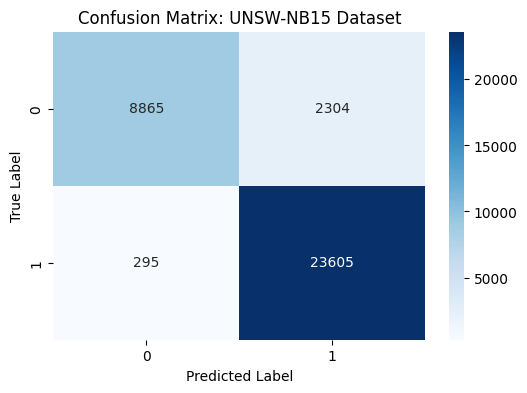

In [5]:
# --- UNSW-NB15 Dataset ---
unsw_df = pd.read_csv(unsw_train_path)
unsw_df.drop(columns=['id', 'proto', 'service', 'state', 'attack_cat'], errors='ignore', inplace=True)
run_logistic_pipeline(unsw_df, 'label', 'UNSW-NB15 Dataset')
